In [1]:
import numpy as np
import os.path
import scipy
import argparse
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import cv2
import sys
import caffe
import scipy.misc
from PIL import Image
from IPython.display import Image as IPython_display
from tqdm import tqdm
%matplotlib inline

caffe.set_mode_cpu()

Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]
label_colours = np.array([Sky, Building, Pole, Road, Pavement, 
                        Tree, SignSymbol, Fence, Car, Pedestrian, 
                        Bicyclist, Unlabelled])

In [2]:
def process(img_path):
    input_shape = net.blobs['data'].data.shape
    
    image = cv2.imread(os.path.join('image',img_path))
    image = cv2.resize(image, (input_shape[3],input_shape[2]))
    input_image = image.transpose((2,0,1))
    input_image = np.asarray([input_image])

    out = net.forward(data=input_image)
    
    predicted = net.blobs['prob'].data
    output = np.squeeze(predicted[0,:,:,:])
    ind = np.argmax(output, axis=0)

    r = ind.copy()
    g = ind.copy()
    b = ind.copy()

    for l in range(0,12):
        r[ind==l] = label_colours[l,0]
        g[ind==l] = label_colours[l,1]
        b[ind==l] = label_colours[l,2]
    rgb = np.zeros((ind.shape[0], ind.shape[1], 3))
    rgb[:,:,0] = r/255.0
    rgb[:,:,1] = g/255.0
    rgb[:,:,2] = b/255.0
 
    image = image[:,:,(2,1,0)]
    
    scipy.misc.imsave('image/output/'+img_path[:-4]+'_original.jpg', image)
    scipy.misc.imsave('image/output/'+img_path[:-4]+'_segmented.jpg', rgb)
    
    bg = Image.open('image/output/'+img_path[:-4]+'_original.jpg')
    fg = Image.open('image/output/'+img_path[:-4]+'_segmented.jpg')
    overlay = Image.blend(bg, fg, 0.5)
    overlay.save('image/output/'+img_path[:-4]+'_overlay.jpg')
    img_plot(image, rgb)
    
def img_plot(image, rgb):
    fig = plt.figure(figsize=(16, 10))
  
    fig.add_subplot(1,2,1)
    plt.imshow(image)

    fig.add_subplot(1,2,2)
    plt.imshow(rgb)   
    plt.show()

## Sample Segmentation

In [3]:
model = 'Models/segnet_basic_inference.prototxt'
weights = 'Models/Training/segnet_basic_iter_10000.caffemodel'
net = caffe.Net(model,weights,caffe.TEST)

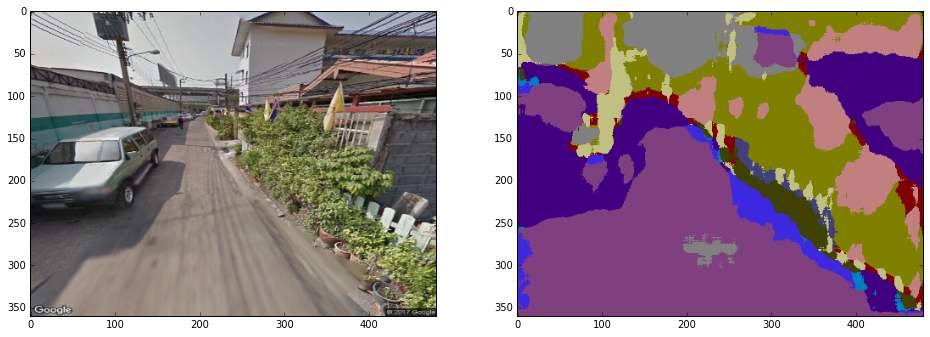

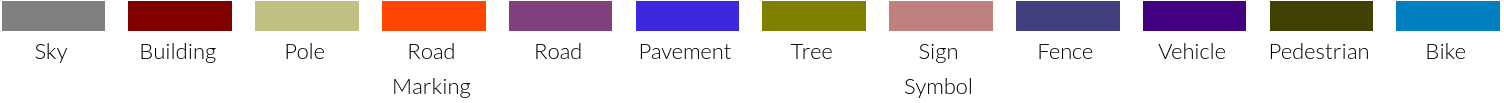

In [4]:
process('1.jpg')
IPython_display('image/color_tags.png')

** Overlay **

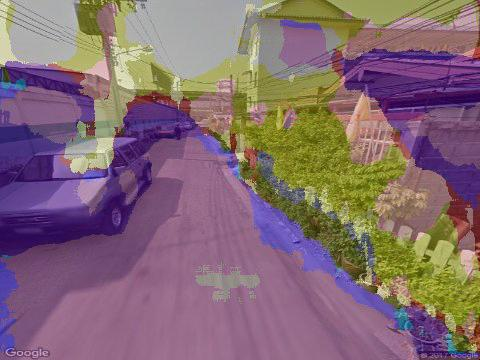

In [5]:
IPython_display('image/output/1_overlay.jpg')

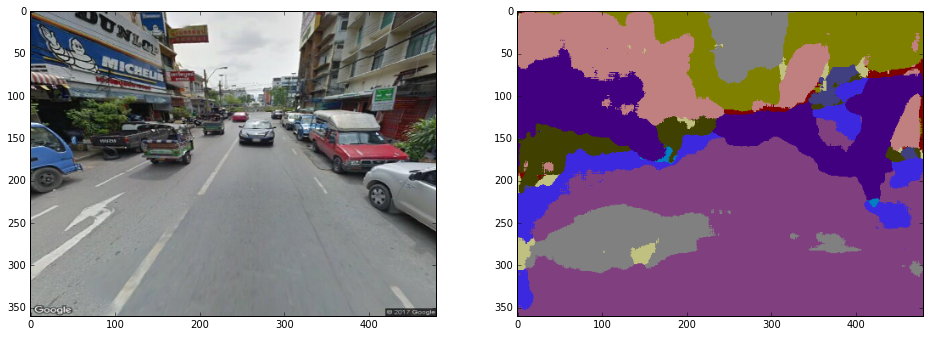

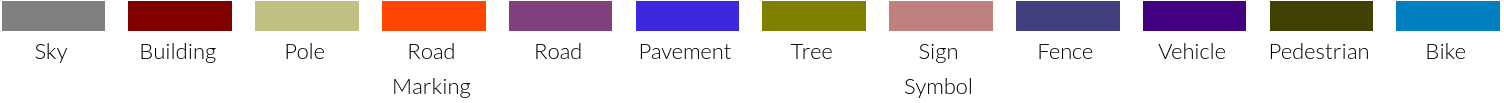

In [6]:
process('2.jpg')
IPython_display('image/color_tags.png')

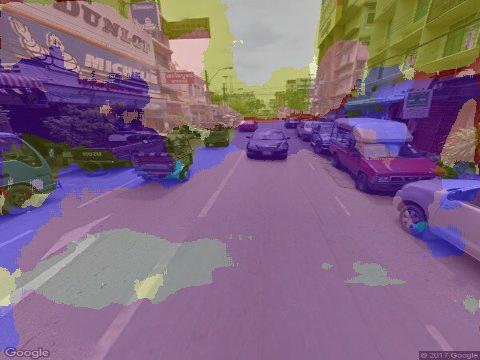

In [7]:
IPython_display('image/output/2_overlay.jpg')